# Questions about the Netflix Database 

1 - What is the average runtime of the movies listed in the database?

2 - What percentage of TvShows in the database are realeased before 2015 ?

3 - Which genres are the most common across the database entries?

4 - Which country has produced the most content in the database?

5 - Kids movies

## Building Connection with python 

In [3]:
import pymysql
import pandas as pd

conn = pymysql.connect(
    host="localhost",
    user="root",
    password="Jenil1234",
    database="netflix"
)
cursor = conn.cursor()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1 - What is the average runtime of the movies listed in the database?

In [5]:
query = """ select netflix_titles.country ,  round(avg(netflix_titles.duration),2) as avg_duration
from netflix_titles
group by netflix_titles.country
order by avg_duration desc 
limit 5;
""" 

cursor.execute(query)

rows = cursor.fetchall()

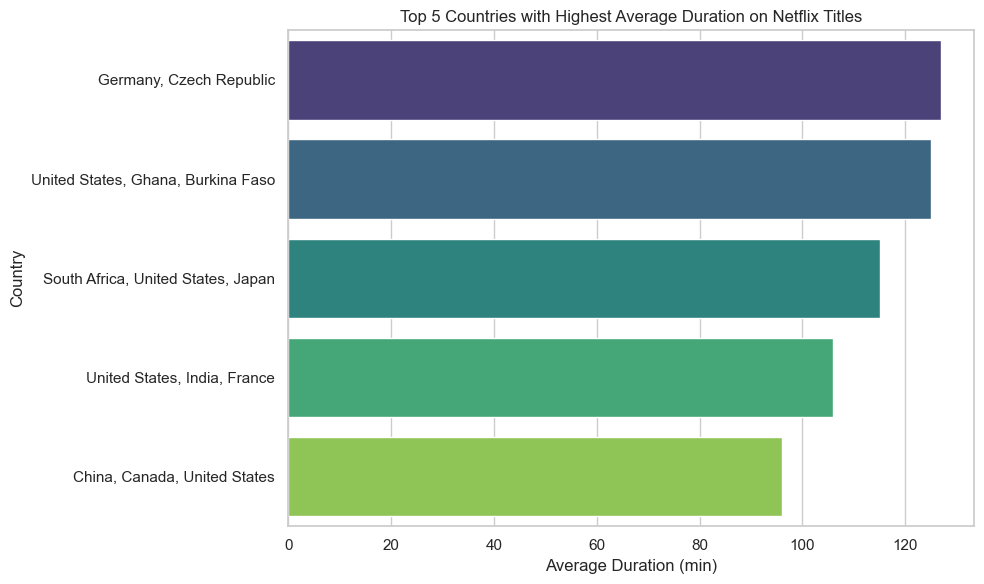

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the DataFrame
data = {
    'Country': [
        'Germany, Czech Republic',
        'United States, Ghana, Burkina Faso',
        'South Africa, United States, Japan',
        'United States, India, France',
        'China, Canada, United States'
    ],
    'Avg Duration (min)': [127, 125, 115, 106, 96]
}

df = pd.DataFrame(data)

# Setting the visual style
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='Avg Duration (min)',
    y='Country',
    data=df,
    hue='Country',
    palette='viridis',
    dodge=False,
    legend=False
)

# Adding title and labels
barplot.set_title('Top 5 Countries with Highest Average Duration on Netflix Titles')
barplot.set_xlabel('Average Duration (min)')
barplot.set_ylabel('Country')

# Display the plot
plt.tight_layout()
plt.show()


## 2 - What percentage of TvShows in the database are realeased before 2015 ?

In [10]:
query = """ 
SELECT 
    netflix_titles.type, 
    COUNT(CASE WHEN netflix_titles.release_year <= 2022 THEN 1 END) AS count_before_2015
FROM 
    netflix_titles
WHERE
    netflix_titles.type = 'TV Show'
GROUP BY 
    netflix_titles.type;
    """

cursor.execute(query)

rows = cursor.fetchall()

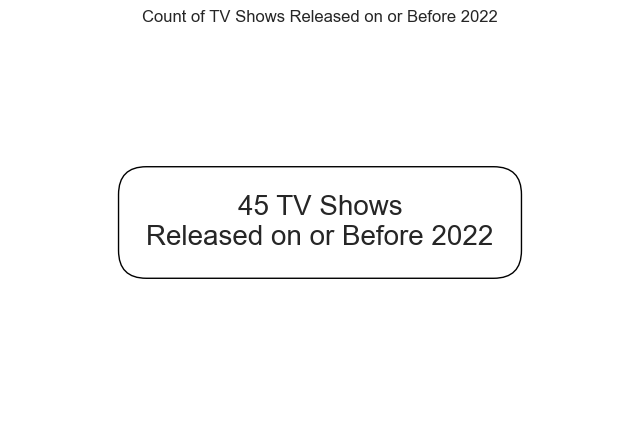

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame from fetched data
df = pd.DataFrame(rows, columns=['Type', 'Count Before 2022'])

# Single Value Annotation
plt.figure(figsize=(8, 5))
plt.text(0.5, 0.5, f'{df["Count Before 2022"][0]} TV Shows\nReleased on or Before 2022',
         fontsize=20, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
plt.title('Count of TV Shows Released on or Before 2022')
plt.axis('off')  # Hide axes
plt.show()


## 3 - Which genres are the most common across the database entries?

In [16]:
query = """

select netflix_titles.rating , count(netflix_titles.rating) as total_rating 
from netflix_titles
group by netflix_titles.rating
order by total_rating desc;
"""

cursor.execute(query)

rows = cursor.fetchall()

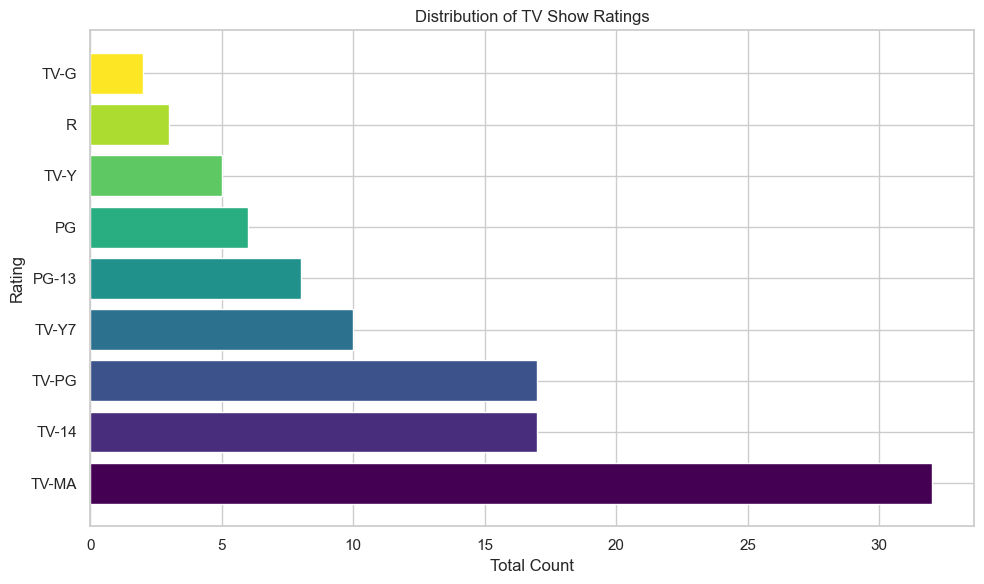

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Query result data
data = {
    'Rating': ['TV-MA', 'TV-14', 'TV-PG', 'TV-Y7', 'PG-13', 'PG', 'TV-Y', 'R', 'TV-G'],
    'Total Rating': [32, 17, 17, 10, 8, 6, 5, 3, 2]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define color map
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(df)))

# Create the bar plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df['Rating'], df['Total Rating'], color=colors)

# Adding title and labels
plt.title('Distribution of TV Show Ratings')
plt.xlabel('Total Count')
plt.ylabel('Rating')

# Display the plot
plt.tight_layout()
plt.show()


## 4 - Which country has produced the most content in the database?

In [22]:
query = """ 
select netflix_titles.country , count(netflix_titles.title) as count_title
from netflix_titles
group by netflix_titles.country
order by count_title desc 
limit 6;
"""

cursor.execute(query)

rows = cursor.fetchall()

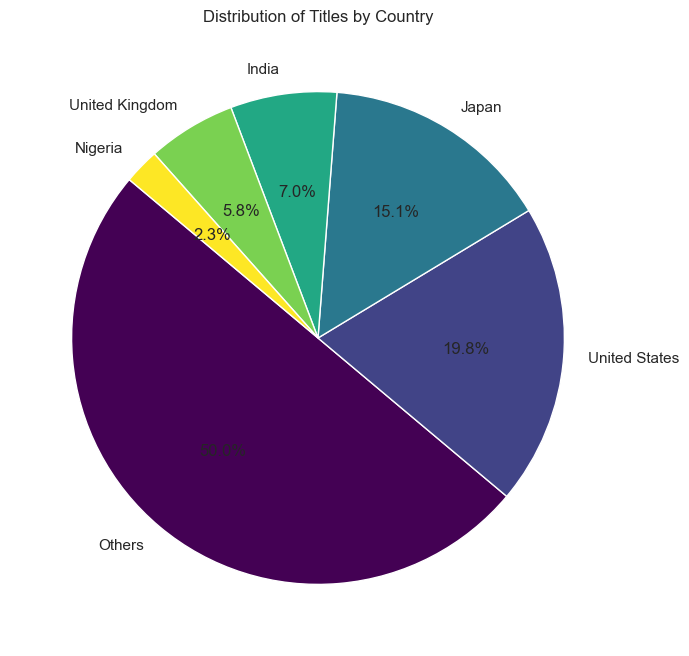

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data with manual 'Others' value
data = {
    'Country': ['Others', 'United States', 'Japan', 'India', 'United Kingdom', 'Nigeria'],
    'Count': [43, 17, 13, 6, 5, 2]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))

# Pie chart parameters
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(df)))
plt.pie(df['Count'], labels=df['Country'], colors=colors, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Distribution of Titles by Country')

# Display the plot
plt.show()


## 5 - Kids movies 

In [30]:
query = """ 
SELECT DISTINCT netflix_titles.title
FROM netflix_titles
WHERE netflix_titles.listed_in LIKE '%Kids%';
"""

cursor.execute(query)
rows = cursor.fetchall()

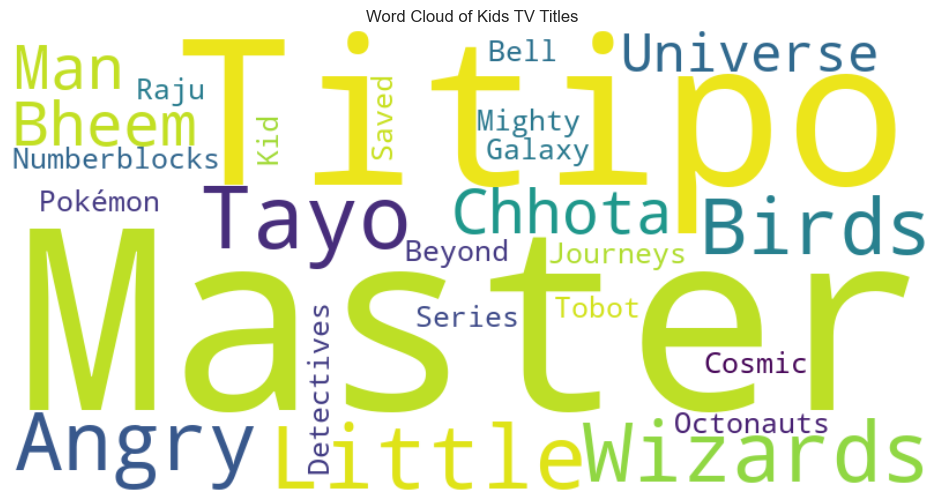

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Data from the query
title = [
    "Tayo and Little Wizards",
    "Angry Birds",
    "Chhota Bheem",
    "He-Man and the Masters of the Universe",
    "Numberblocks",
    "Saved by the Bell",
    "Pokémon Master Journeys: The Series",
    "Titipo Titipo",
    "Mighty Raju",
    "Kid Cosmic",
    "Octonauts: Above & Beyond",
    "Tobot Galaxy Detectives"
]

# Join titles into a single string
text = ' '.join(title)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Kids TV Titles')
plt.show()


## THANKYOU FOR READING !!